In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import pylab as pl

bins_cnt = 50
df = pd.read_csv ('feats.csv',sep='\t')
df['mem_footprint'] = df.apply(lambda row: ((64+32)*row['nr_nzeros'] + 32*(row['nr_rows']+1))/(8*1024*1024), axis=1)
print(df.columns)



def plot_histogram_of_features(df, validation_matrices, title):
    df_custom = df[df['matrix'].isin(validation_matrices)].sort_values('mem_footprint').reset_index(drop=True)
    df_custom.to_csv(title+'.csv', sep='\t', index=False)

    df_custom4 = df_custom[['matrix','mem_footprint','nnz-r-avg','skew_coeff','num-neigh-avg','cross_row_sim-avg']].reset_index(drop=True)

    fig = plt.figure(figsize=(18,20))
    ax = fig.gca()

    df_custom4.hist(bins=bins_cnt, ax=ax)
    pl.suptitle(title)
    plt.tight_layout()
    plt.savefig(title+'.pdf', facecolor='white', transparent=False)

Index(['matrix', 'nr_rows', 'nr_cols', 'nr_nzeros', 'density', 'nnz-r-min',
       'nnz-r-max', 'nnz-r-avg', 'nnz-r-std', 'nnz-c-min', 'nnz-c-max',
       'nnz-c-avg', 'nnz-c-std', 'skew_coeff', 'bw-min', 'bw-max', 'bw-avg',
       'bw-std', 'bw-scaled-min', 'bw-scaled-max', 'bw-scaled-avg',
       'bw-scaled-std', 'sc-min', 'sc-max', 'sc-avg', 'sc-std',
       'sc-scaled-min', 'sc-scaled-max', 'sc-scaled-avg', 'sc-scaled-std',
       'nr_groups-r-min', 'nr_groups-r-max', 'nr_groups-r-avg',
       'nr_groups-r-std', 'num-neigh-avg', 'cross_row_sim-avg',
       'mem_footprint'],
      dtype='object')


/tmp/ipykernel_84847/350162154.py:21: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_custom4.hist(bins=bins_cnt, ax=ax)


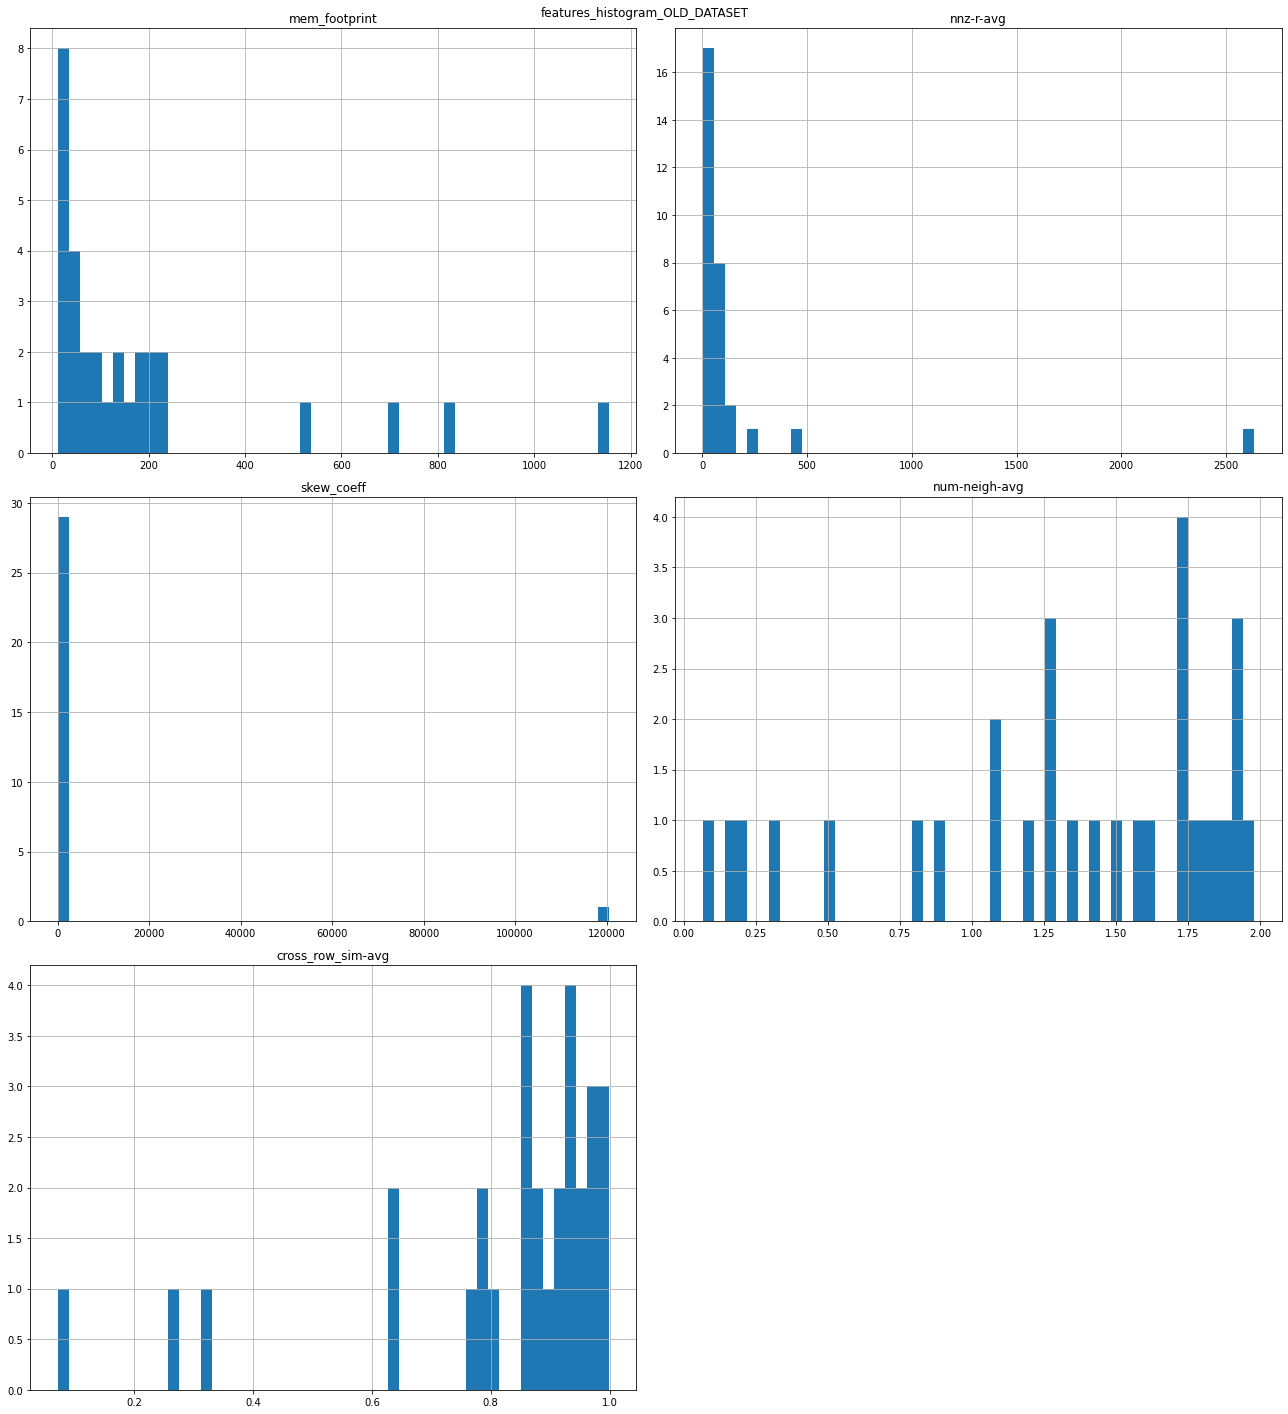

In [10]:
old_validation_matrices = ['scircuit','mac_econ_fwd500','raefsky3','bbmat','conf5_4-8x8-15',
                           'mc2depi','rma10','cop20k_A','webbase-1M','cant','pdb1HYS','TSOPF_RS_b300_c3',
                           'Chebyshev4','consph','shipsec1','PR02R','mip1','rail4284','pwtk',
                           'crankseg_2','Si41Ge41H72','TSOPF_RS_b2383','in-2004','Ga41As41H72',
                           'eu-2005','wikipedia-20051105','ldoor','circuit5M','bone010','cage15']
plot_histogram_of_features(df, old_validation_matrices, "features_histogram_OLD_DATASET")


/tmp/ipykernel_7027/350162154.py:21: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_custom4.hist(bins=bins_cnt, ax=ax)


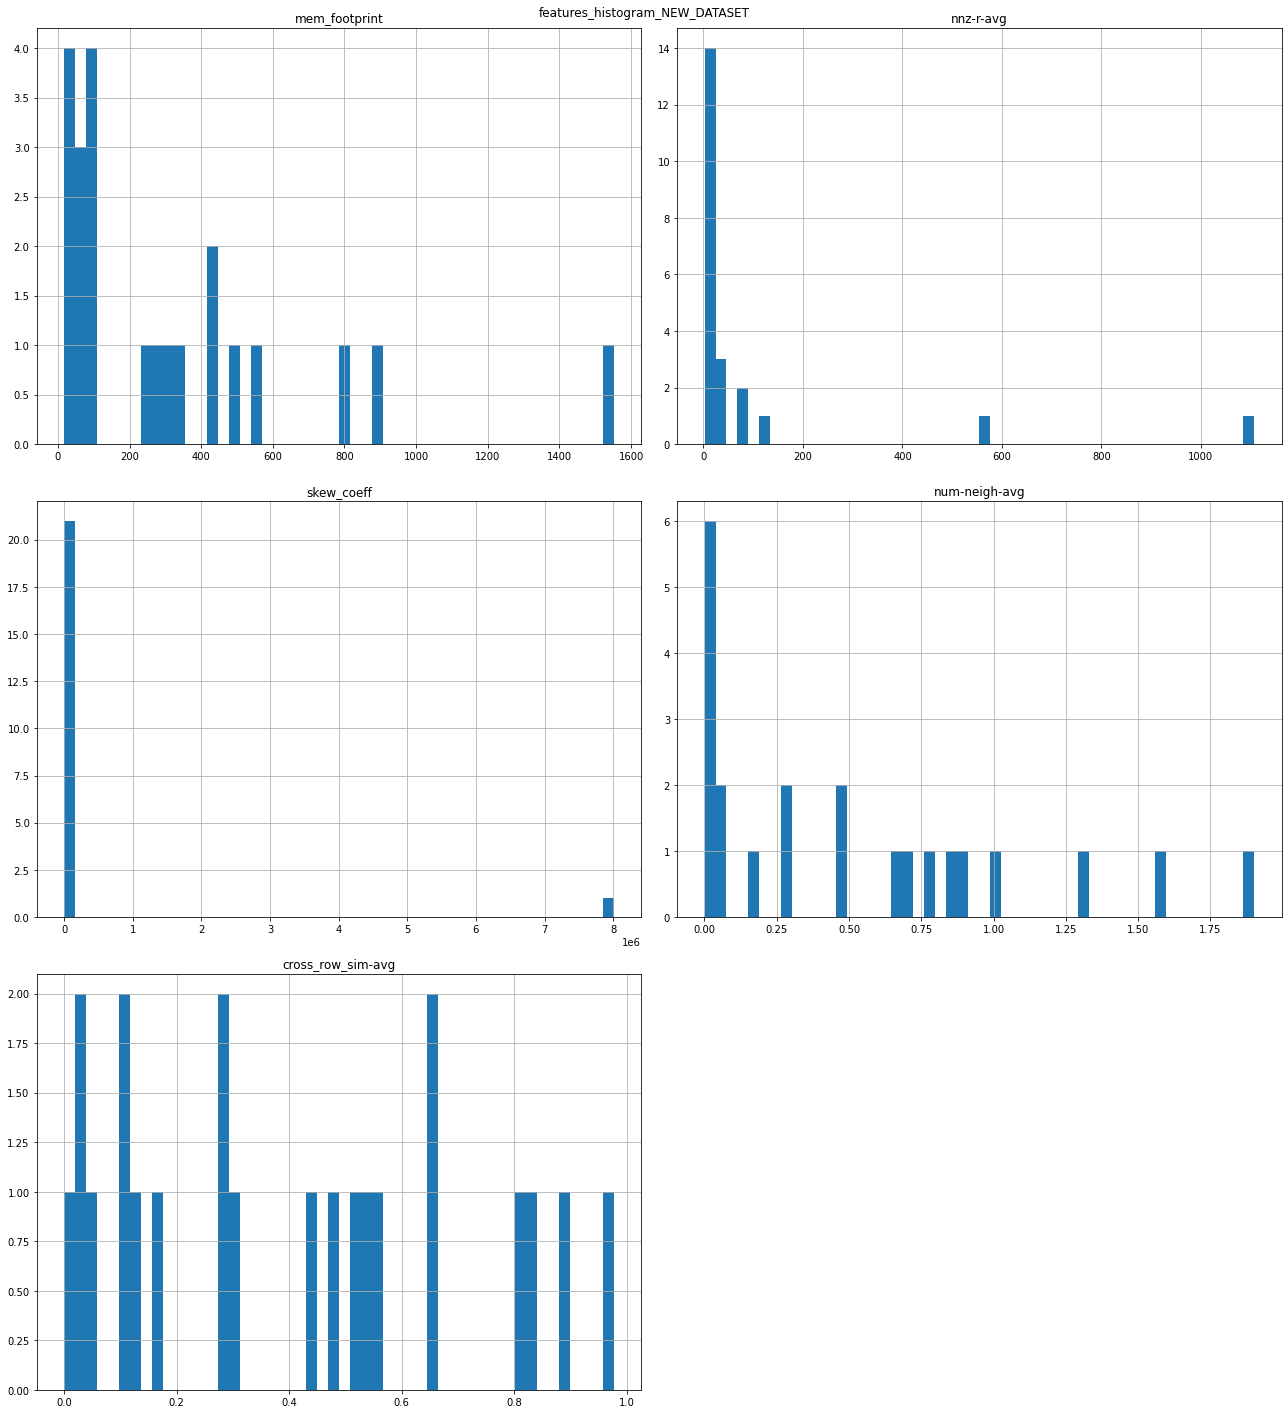

In [2]:
new_validation_matrices = ['ASIC_680k','appu','audikw_1','com-Youtube','CurlCurl_2','delaunay_n22','dgreen',
                           'dielFilterV2real','GL7d20','gupta3','human_gene1','kmer_V2a','kron_g500-logn18',
                           'mawi_201512012345','radiation','rajat30','rgg_n_2_17_s0','roadNet-TX',
                           'soc-LiveJournal1','Stanford_Berkeley','sx-stackoverflow','thermomech_dK']
plot_histogram_of_features(df, new_validation_matrices, "features_histogram_NEW_DATASET")


/tmp/ipykernel_84847/350162154.py:21: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_custom4.hist(bins=bins_cnt, ax=ax)


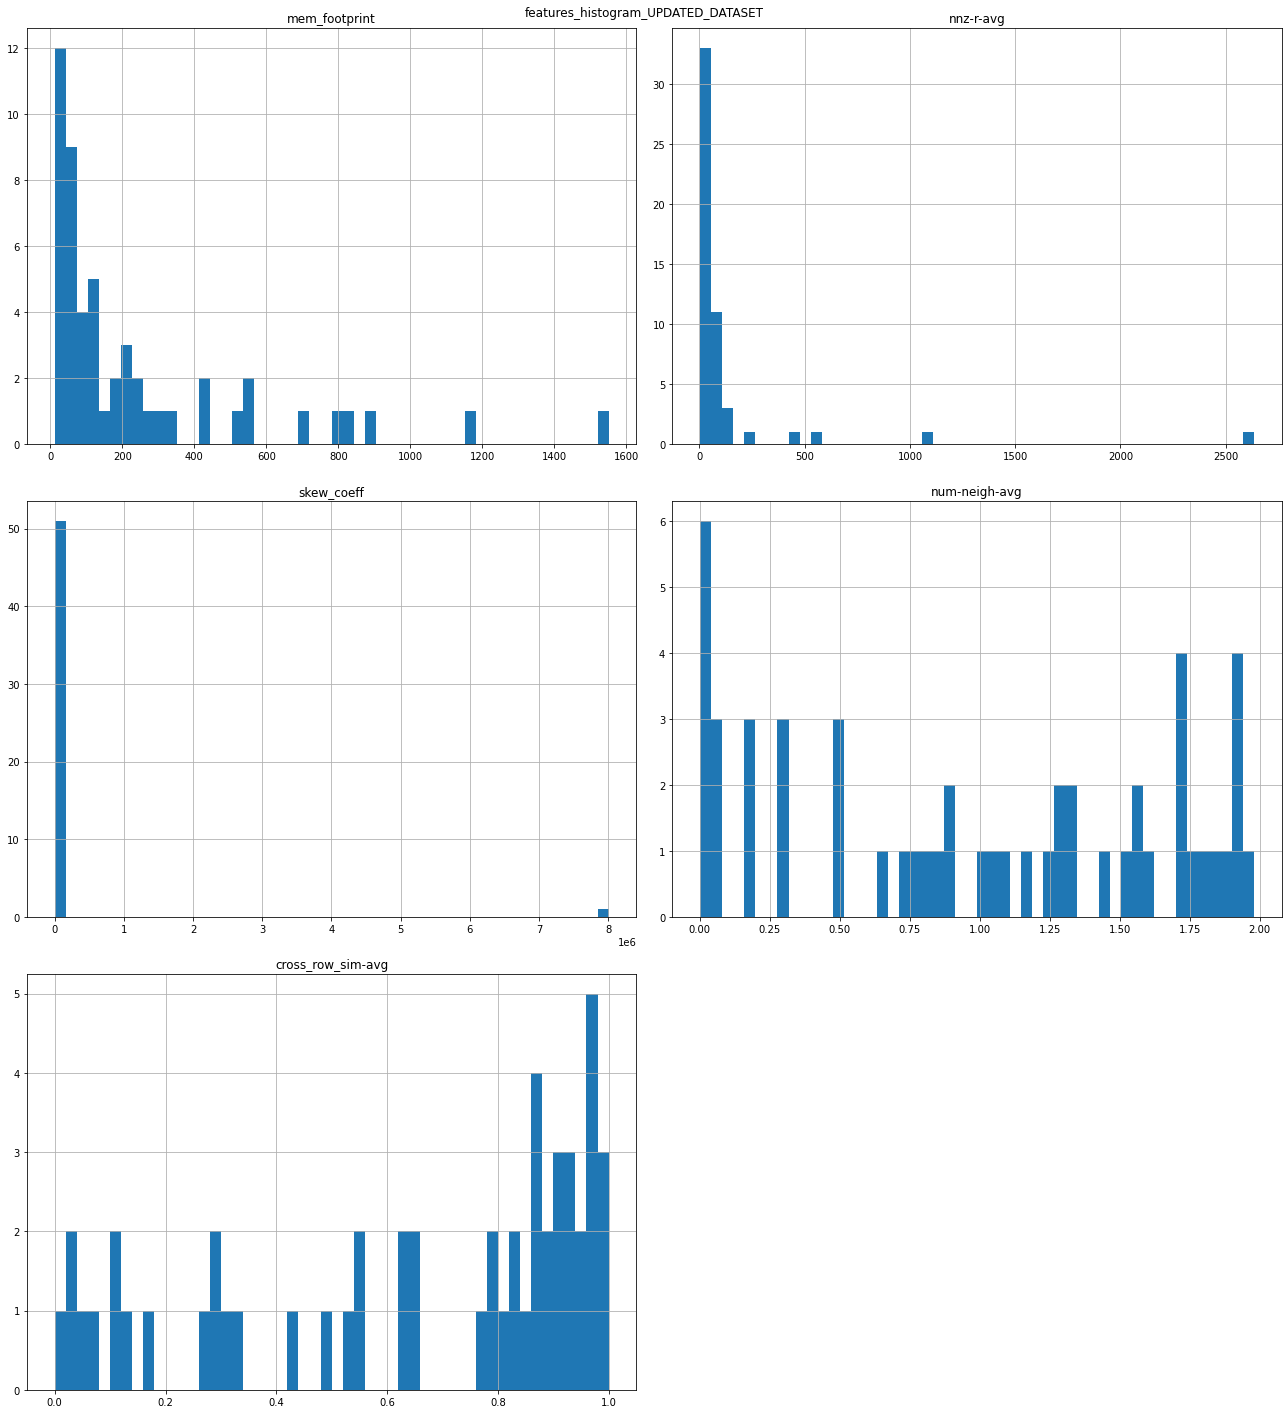

In [11]:
old_validation_matrices = ['scircuit','mac_econ_fwd500','raefsky3','bbmat','conf5_4-8x8-15','mc2depi','rma10','cop20k_A','webbase-1M','cant','pdb1HYS','TSOPF_RS_b300_c3','Chebyshev4','consph','shipsec1','PR02R','mip1','rail4284','pwtk','crankseg_2','Si41Ge41H72','TSOPF_RS_b2383','in-2004','Ga41As41H72','eu-2005','wikipedia-20051105','ldoor','circuit5M','bone010','cage15']
new_validation_matrices = ['ASIC_680k','appu','audikw_1','com-Youtube','CurlCurl_2','delaunay_n22','dgreen',
                           'dielFilterV2real','GL7d20','gupta3','human_gene1','kmer_V2a','kron_g500-logn18',
                           'mawi_201512012345','radiation','rajat30','rgg_n_2_17_s0','roadNet-TX',
                           'soc-LiveJournal1','Stanford_Berkeley','sx-stackoverflow','thermomech_dK']
updated_validation_matrices = new_validation_matrices + old_validation_matrices
plot_histogram_of_features(df, updated_validation_matrices, "features_histogram_UPDATED_DATASET")


/tmp/ipykernel_84847/350162154.py:21: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_custom4.hist(bins=bins_cnt, ax=ax)


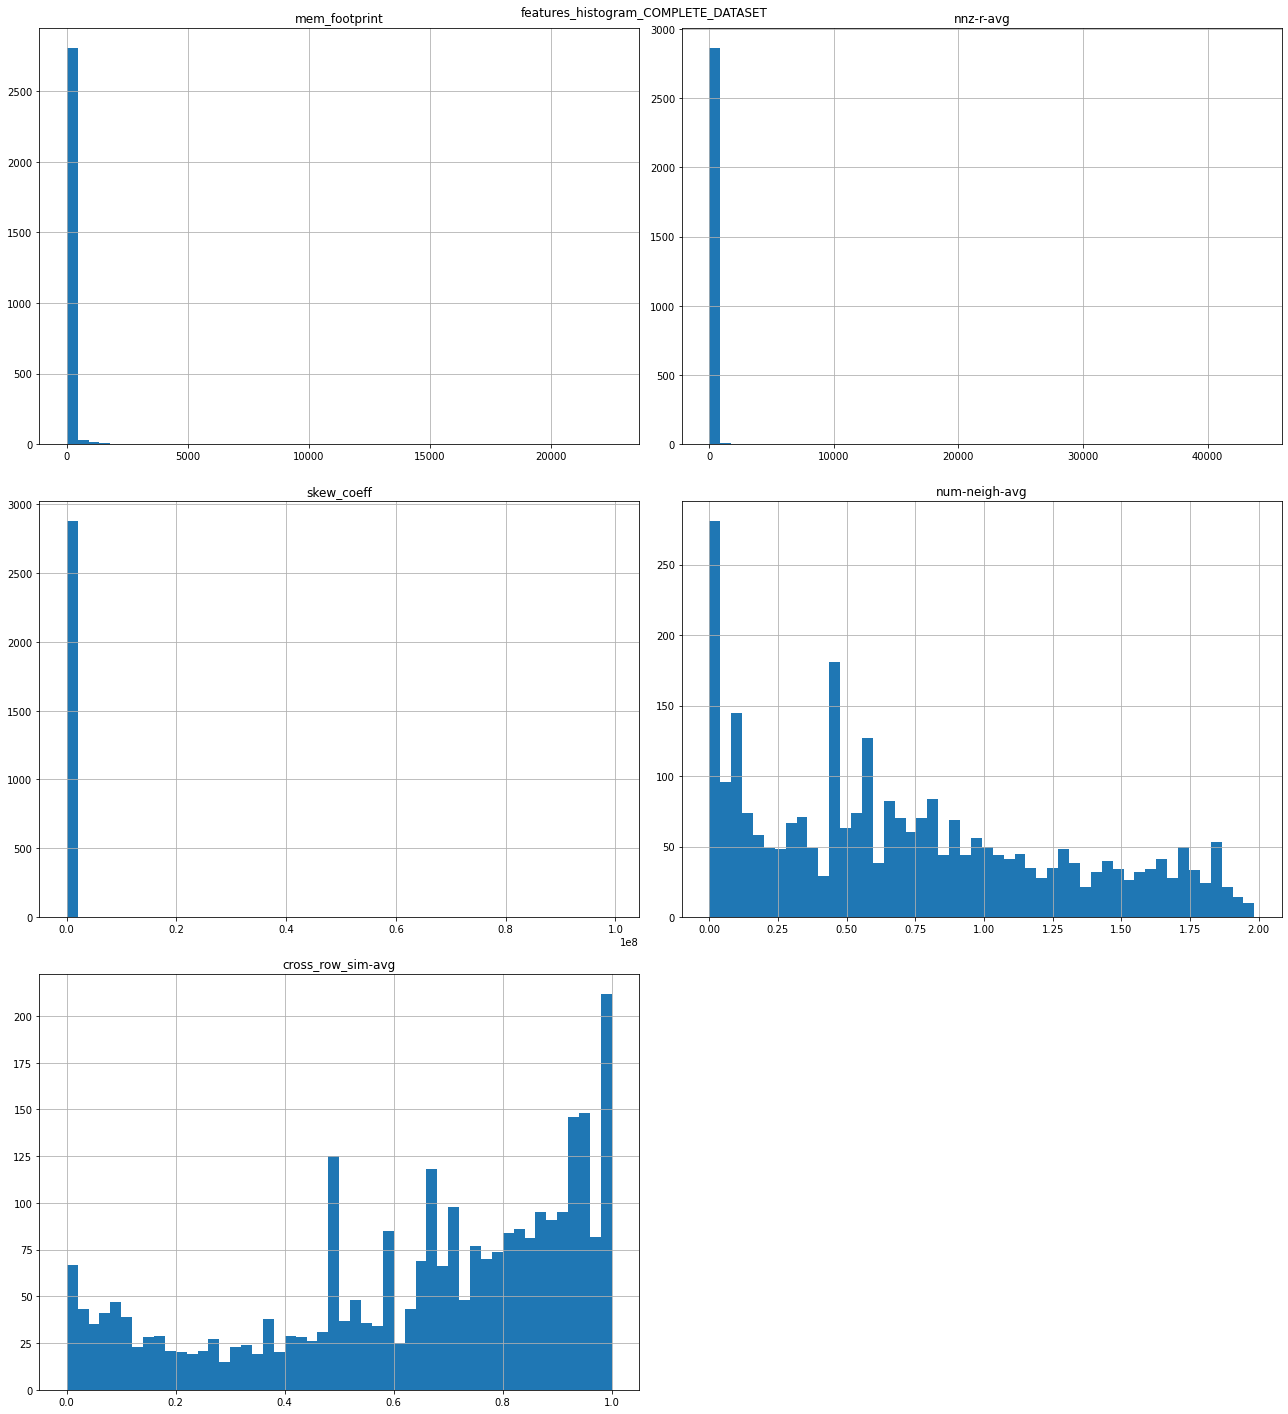

In [12]:
all_validation_matrices = list(set(df['matrix']))
plot_histogram_of_features(df, all_validation_matrices, "features_histogram_COMPLETE_DATASET")